In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pickle
import vclamp_evaluator_HMMtoHH as vcl_ev
import HMM_plotter as plotter
import generalized_genSim_shorten_time_HMM as ggsdHMM
import generalized_genSim_shorten_time as ggsd
#from deap import tools
evaluator = vcl_ev.Vclamp_evaluator_HMM('./csv_files/params_na12mut8st_mod_narrow.csv', 'Basis', 'na12mut8st', 'na16', objective_names=['v_half_act', 'gv_slope', 'v_half_ssi', 'ssi_slope','tau0','peak_current','ttp'])
cp_file = './cp.pkl'
channel_name = 'na12mut8st'

##RBS you now need to check in the evaluator that you call peak_amp and TTP with the right ranges: [13,36?]

{'v_half_act': -24.766773947903665, 'gv_slope': 6.182889399959395, 'v_half_ssi': -54.872868637744034, 'ssi_slope': 7.05877216715777, 'tau0': 0.42009171742316037, 'peak_amp': [-0.0156116142392469, -0.08689641452307355, -0.31279869152835266, -0.81355296468319, -1.5702849387827609, -2.358331402478808, -2.9551794094406874, -3.2879612751395504, -3.398903176286063, -3.344838674282482, -3.2027341340615103, -2.998401814643222, -2.7660205398094537, -2.482249121696948, -2.2133286760570616, -1.9051071015409131, -1.597164948160441, -1.2957842129686206, -3.2027341340615103], 'time_to_peak': [5.950000000000051, 6.075000000000053, 5.800000000000049, 5.6500000000000465, 5.525000000000045, 5.425000000000043, 5.350000000000042, 5.300000000000042, 5.250000000000041, 5.2250000000000405, 5.17500000000004, 5.17500000000004, 5.150000000000039, 5.125000000000039, 5.125000000000039, 5.125000000000039, 5.100000000000039, 5.100000000000039, 5.17500000000004]}


In [2]:
initial_params_list = [
    4.584982656184167e+01,
    2.393541665657613e-02,
    1.440952344322651e-02,
    8.847609128769419e-02,
    1.980838207143563e+01,
    2.217709530008501e-02,
    5.650174488683913e-01,
    6.108403283302217e-02,
    7.181189201089192e+01,
    6.593790601261940e-02,
    7.531178253431512e-01,
    3.647978133116471e-02,
    2.830146966213825e+00,
    2.890045633775495e-01,
    6.960300544163878e-02,
    5.757824421450554e-01,
    1.628407420157048e+02,
    2.680107016756367e-02,
    10,
    10,
    8000,
    1,
    1
]

In [3]:
opt_data = pickle.load( open( cp_file, "rb" ) )

In [4]:
print(opt_data.keys())
hof = opt_data['halloffame']
log = opt_data['logbook']

dict_keys(['population', 'generation', 'parents', 'halloffame', 'history', 'logbook', 'rndstate'])


In [5]:
print(log)


gen	nevals	avg    	std    	min    	max        
1  	500   	184116 	575606 	50.0804	2.04244e+06
2  	500   	190991 	588176 	48.869 	2.04268e+06
3  	500   	91495.8	417978 	45.3031	2.04251e+06
4  	500   	61825.8	343641 	16.2466	2.04251e+06
5  	500   	61682.6	343601 	16.2466	2.04304e+06
6  	500   	38918.2	273177 	16.2466	2.04299e+06
7  	500   	10669.2	120009 	16.2466	2.04111e+06
8  	500   	12497.5	142117 	18.5512	2.04211e+06
9  	500   	10988.4	105026 	16.9347	1.11317e+06
10 	500   	5300.44	81348.4	15.2591	2.04092e+06
11 	500   	9686.6 	107254 	16.9347	2.03999e+06
12 	500   	9799.86	107269 	16.9347	2.04082e+06
13 	500   	5611.9 	70201.4	11.9602	1.11316e+06
14 	500   	5694.41	70200.8	11.9602	1.11286e+06
15 	500   	8878.81	101370 	16.9347	2.0379e+06 
16 	500   	8741.89	101439 	13.0069	2.04053e+06
17 	500   	5606.18	70220.3	13.666 	1.11329e+06
18 	500   	9718.97	99093.7	14.7102	1.11316e+06
19 	500   	792.479	1847.18	11.8199	19327.1    
20 	500   	4980.99	70230.2	8.26323	1.11308e+06
21 	500   	70

In [6]:
def scale(val, src):
    """
    scale val in the 0,1 range when given lb and ub
    """
    return ((val - src[0]) / (src[1]-src[0])) 

In [65]:
csv_file = './csv_files/params_na12mut8st_mod_med.csv'
def get_place_in_range(opt_ps,csv_file):
    p_names = []
    p_fact = []
    param_list = ehn.read_params_range(csv_file)
    for ind,p_name in enumerate(param_list.keys()):
        tmp = param_list[p_name]
        lb = tmp[1]
        ub = tmp[2]
        print(f'lb:{lb} ub:{ub} p:{opt_ps[ind]}')
        fact = scale(opt_ps[ind],[lb,ub])
        p_names.append(p_name)
        p_fact.append(fact)
    return p_names,p_fact

    

In [66]:
best_hof = hof[0]
p = best_hof
print("Best params: " + str(best_hof))
print("[inact_err, act_err]: " + str(evaluator.evaluate_with_lists(best_hof)))
#print("Best invs list: " + str(best_indvs))

Best params: [79.87034908073117, 0.09136853281109035, 0.06190940889193948, 0.058203906234066995, 89.48045762964628, 0.10824791987994221, 1.4721192584751461, 0.07208991812112298, 253.48633971745056, 0.014299985478763965, 2.107377857298974, 0.021226984326998533, 3.791707431524996, 1.382156790164669, 0.047439193401842175, 1.1435699262622891, 571.4591152243064, 0.041178194241920284, 9.297989162951048, 21.299845766028817, 16473.121905504337, 2.608874316830991, 3.472065214975941]
[0.03506735820758084, 0.11595141786069715, 0.06053263404863427, 0.7776952759230714, 1.900000000000027, 0.0006488572118797606]
[<bluepyopt.objectives.Objective object at 0x7fffbe85aa00>, <bluepyopt.objectives.Objective object at 0x7fffbe7eb220>, <bluepyopt.objectives.Objective object at 0x7fffbe7eb280>, <bluepyopt.objectives.Objective object at 0x7fffbe7eb2e0>, <bluepyopt.objectives.Objective object at 0x7fffbe7eb340>, <bluepyopt.objectives.Objective object at 0x7fffbe7eb3a0>, <bluepyopt.objectives.Objective object a

In [67]:
pnames,pfactors = get_place_in_range(p,csv_file)
print(pfactors)

ValueError: could not convert string to float: ''

1
2
3
4


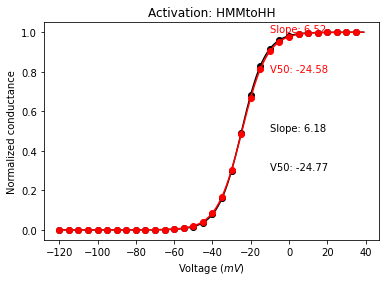

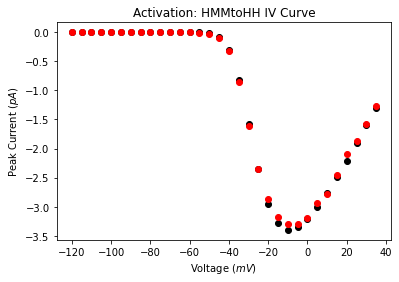

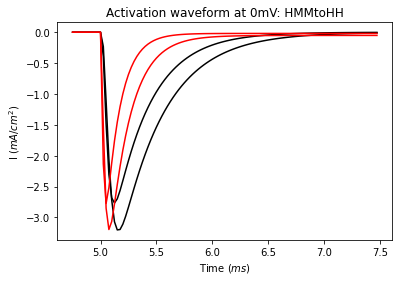

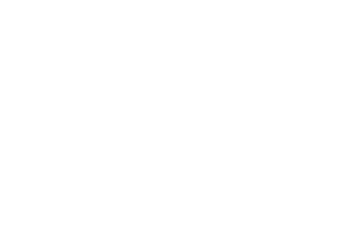

In [9]:
plotter.make_act_plots(p, "HMMtoHH", None, None, "./Plots_Folder/jinan_test.pdf", is_HMM = True, channel_name = channel_name,channel_name_HH = 'na16')

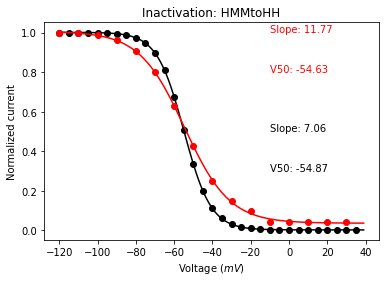

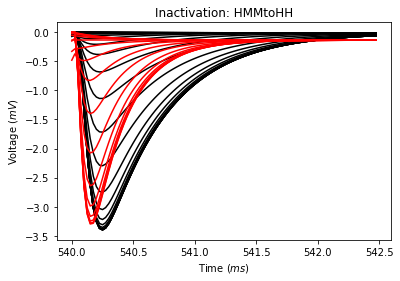

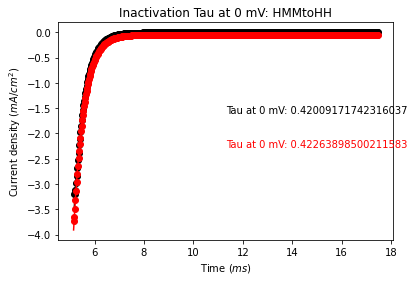

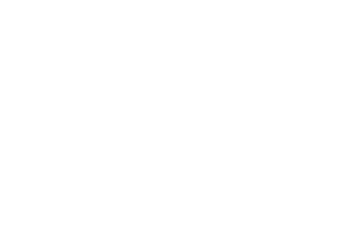

In [10]:
plotter.make_inact_plots(p, "HMMtoHH", None, None, "./Plots_Folder/jinan_test.pdf", is_HMM = True, channel_name = channel_name,channel_name_HH = 'na16')

In [11]:
import eval_helper_na12mut8st as ehn8
import eval_helper_na12mut as ehn
import curve_fitting as cf
act_obj = ggsdHMM.Activation(channel_name='na16')

# Test HH Target data

In [12]:
act_obj = ggsd.Activation(channel_name='na16')
tau0 = ehn.find_tau0(act_obj)

In [13]:
is_HMM = False 
wild_data = {}
# Create genSim objects
act_obj = ggsd.Activation(channel_name='na16')
tau0 = ehn.find_tau0(act_obj)
act_obj = ggsd.Activation(channel_name='na16')
gv_slope, v_half_act, top, bottom = cf.calc_act_obj(act_obj)
peak_amp = ehn.find_peak_amp(act_obj,[14,33])
time_to_peak = ehn.find_time_to_peak(act_obj,[14,33])
inact_obj = ggsd.Inactivation(channel_name='na16')
#recov_obj = ggsdHMM.RFI(channel_name=self.channel_name_HH)

ssi_slope, v_half_inact, top, bottom = cf.calc_inact_obj(inact_obj)
#y0, plateau, percent_fast, k_fast, k_slow = cf.calc_recov_obj(recov_obj)
# gv_slope, v_half_act, top, bottom = (1, 1, 1, 1)
# ssi_slope, v_half_inact, top, bottom = (1, 1, 1, 1)
# y0, plateau, percent_fast, k_fast, k_slow = (1, 1, 1, 1, 1)

# Ramp Protocol
# ramp = ggsdHMM.Ramp(channel_name=self.channel_name)
# ramp_area = ramp.areaUnderCurve
# persistent_curr = ramp.persistentCurrent()

wild_data['v_half_act'] = v_half_act
wild_data['gv_slope'] = gv_slope
wild_data['v_half_ssi'] = v_half_inact
wild_data['ssi_slope'] = ssi_slope
#wild_data['tau_fast'] = 1 / k_fast
#wild_data['tau_slow'] = 1 / k_slow
#wild_data['percent_fast'] = percent_fast
# wild_data['udb20'] = 0
wild_data['tau0'] = tau0
# wild_data['ramp'] = ramp_area
# wild_data['persistent'] = persistent_curr

# Some extra objectives added last minute, so this is a bit hard-coded
wild_data['peak_amp'] = peak_amp
wild_data['time_to_peak'] = time_to_peak
print(wild_data)



{'v_half_act': -24.766773947903665, 'gv_slope': 6.182889399959395, 'v_half_ssi': -54.872868637744034, 'ssi_slope': 7.05877216715777, 'tau0': 0.42009171742316037, 'peak_amp': [-0.0156116142392469, -0.08689641452307355, -0.31279869152835266, -0.81355296468319, -1.5702849387827609, -2.358331402478808, -2.9551794094406874, -3.2879612751395504, -3.398903176286063, -3.344838674282482, -3.2027341340615103, -2.998401814643222, -2.7660205398094537, -2.482249121696948, -2.2133286760570616, -1.9051071015409131, -1.597164948160441, -1.2957842129686206], 'time_to_peak': [5.950000000000051, 6.075000000000053, 5.800000000000049, 5.6500000000000465, 5.525000000000045, 5.425000000000043, 5.350000000000042, 5.300000000000042, 5.250000000000041, 5.2250000000000405, 5.17500000000004, 5.17500000000004, 5.150000000000039, 5.125000000000039, 5.125000000000039, 5.125000000000039, 5.100000000000039, 5.100000000000039]}


# Test HMM

In [14]:
import curve_fitting as cf
gv_slope, v_half_act, top, bottom = cf.calc_act_obj(act_obj)

In [15]:
print(gv_slope, v_half_act, top, bottom )

6.182889399959395 -24.766773947903665 1.0000000000116729 1.844638323009083e-10


In [16]:
ssi_slope, v_half_inact, top, bottom = cf.calc_inact_obj(inact_obj)
           

In [17]:
print(ssi_slope, v_half_inact, top, bottom)

7.05877216715777 -54.872868637744034 0.002864608183022642 1.0008524331966844


In [18]:
import eval_helper as eh
import scoring_functions_relative as sf

objective_names=['v_half_act', 'gv_slope', 'v_half_ssi', 'ssi_slope','tau0','peak_current','ttp']
act_obj = ggsdHMM.Activation(channel_name='na12mut8st')
inact_obj = ggsdHMM.Inactivation(channel_name='na12mut8st')
# recov_obj = ggsdHMM.RFI(channel_name=self.channel_name_HMM)
recov_obj = None
param_values = best_hof
eh.change_params(param_values, scaled=False, is_HMM=True, sim_obj=act_obj)
eh.change_params(param_values, scaled=False, is_HMM=True, sim_obj=inact_obj)


In [19]:
import curve_fitting as cf
errors = []
ssi_slope, v_half_inact, top, bottom = cf.calc_inact_obj(inact_obj)
gv_slope, v_half_act, top, bottom = cf.calc_act_obj(act_obj)
if 'v_half_act' in objective_names:
    vhalf_act_error = (v_half_act - wild_data['v_half_act'])**2
    errors.append(vhalf_act_error)
if 'gv_slope' in objective_names:
    gv_slope_error = (gv_slope - wild_data['gv_slope'])**2
    errors.append(gv_slope_error)
if 'v_half_ssi' in objective_names:
    v_half_ssi_error = (v_half_inact - wild_data['v_half_ssi'])**2
    errors.append(v_half_ssi_error)
if 'ssi_slope' in objective_names:
    ssi_slope_error = (ssi_slope - wild_data['ssi_slope'])**2
    errors.append(ssi_slope_error)
if 'peak_current' in objective_names:
    peak_amp = ehn.find_peak_amp(act_obj,[14,33])
    peak_amp_errors = np.sum([np.abs(peak_amp[i] - wild_data['peak_amp'][i]) for i in range(len(peak_amp))])
    errors.append(peak_amp_errors)
if 'ttp' in objective_names:
    time_to_peak = ehn.find_time_to_peak(act_obj,[14,33])
    time_to_peak_error = np.sum([np.abs(time_to_peak[i] - wild_data['time_to_peak'][i]) for i in range(len(peak_amp))])
    errors.append(time_to_peak_error)
if 'tau0' in objective_names:
    act_obj = ggsdHMM.Activation(channel_name='na12mut8st')
    eh.change_params(param_values, scaled=False, is_HMM=True, sim_obj=inact_obj)
    try:
        tau0 = ehn.find_tau0(act_obj)
        tau0_error = (tau0 - wild_data['tau0'])**2
    except e:
        tau0_error = 1000
    errors.append(tau0_error)

print(errors)

[0.03506735820758084, 0.11595141786069715, 0.06053263404863427, 22.209383747672902, 0.7776952759230714, 1.900000000000027, 6.488572118797605e-06]


In [20]:
print(objective_names)
print(f" vhalf_act is: {v_half_act} WT:{wild_data['v_half_act']} error: {errors[0]}")
print(f" gv_slope is: {gv_slope} WT:{wild_data['gv_slope']} error: {errors[1]}")
print(f" v_half_ssi is: {v_half_inact} WT:{wild_data['v_half_ssi']} error: {errors[2]}")
print(f" ssi_slope is: {ssi_slope} WT:{wild_data['ssi_slope']} error: {errors[3]}")
print(f" peak_current is: {peak_amp} WT:{wild_data['peak_amp']} error: {errors[4]}")
print(f" ttp is: {time_to_peak} WT:{wild_data['time_to_peak']} error: {errors[5]}")
print(f" tau0 is: {tau0} WT:{wild_data['tau0']} error: {errors[6]}")


['v_half_act', 'gv_slope', 'v_half_ssi', 'ssi_slope', 'tau0', 'peak_current', 'ttp']
 vhalf_act is: -24.57951114271379 WT:-24.766773947903665 error: 0.03506735820758084
 gv_slope is: 6.5234057987725755 WT:6.182889399959395 error: 0.11595141786069715
 v_half_ssi is: -54.62683483102505 WT:-54.872868637744034 error: 0.06053263404863427
 ssi_slope is: 11.771455452471233 WT:7.05877216715777 error: 22.209383747672902
 peak_current is: [-0.022094461668234457, -0.09343384389191771, -0.3245633471856255, -0.8513798928966528, -1.61770259551032, -2.3483237903537995, -2.8682791849124367, -3.1698839293455485, -3.296996349111857, -3.305218753803736, -3.1963335474169856, -2.9432781002937842, -2.774205347567609, -2.4488542213376476, -2.0857836094558224, -1.8687905459476137, -1.5834421898699715, -1.2653187741383152] WT:[-0.0156116142392469, -0.08689641452307355, -0.31279869152835266, -0.81355296468319, -1.5702849387827609, -2.358331402478808, -2.9551794094406874, -3.2879612751395504, -3.398903176286063,

In [21]:
np.sum([(time_to_peak[i] - wild_data['time_to_peak'][i]) for i in range(len(peak_amp))])


-1.900000000000027

In [22]:
print(act_obj.ipeak_vec)

[-3.73722129119166]


In [23]:
cf.calc_act_obj(act_obj)

(5.96948704957658,
 -32.420578061898254,
 0.9999999999962366,
 2.1436607733767124e-11)

In [24]:
print(act_obj.ipeak_vec[12])

-0.05209492376684863


In [25]:
i12 = act_obj.all_is[12]
print(i12[np.argmin(i12)])

-0.05519697039801086


In [26]:
print(act_obj.t_vec[np.argmin(i12)])

24.999999999999115


In [27]:
print(len(evaluator.wild_data['time_to_peak']))
print(evaluator.wild_data['time_to_peak'][14:33])

19
[5.125000000000039, 5.125000000000039, 5.100000000000039, 5.100000000000039, 5.17500000000004]


In [28]:
print(best_hof)

[79.87034908073117, 0.09136853281109035, 0.06190940889193948, 0.058203906234066995, 89.48045762964628, 0.10824791987994221, 1.4721192584751461, 0.07208991812112298, 253.48633971745056, 0.014299985478763965, 2.107377857298974, 0.021226984326998533, 3.791707431524996, 1.382156790164669, 0.047439193401842175, 1.1435699262622891, 571.4591152243064, 0.041178194241920284, 9.297989162951048, 21.299845766028817, 16473.121905504337, 2.608874316830991, 3.472065214975941]
